# Classification
- Logistic Regression Model
- Linear Discriminant Analysis
- Quadrati Discriminant Analysis
- K-Nearest Neighbors
- Application to Caravan Insurance Data

In [1]:
# Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
# Loading the data set
df = pd.read_csv('./Textbook_Data/Default.csv')

# Note: factorize() function returns two objects: a label array and an array with unique values
# We are only interested in the first object.
# Create two new columns and give value of 0 for 'No' and 1 for 'Yes'
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]

df.head()

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


C:\Users\lokma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\lokma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


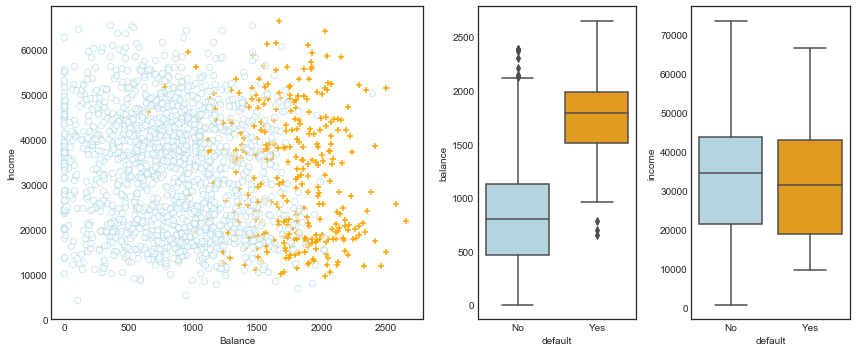

In [3]:
# Use scatter plot and boxplot to visualize the catagorical data
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

# Logistic Regression

C:\Users\lokma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\lokma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


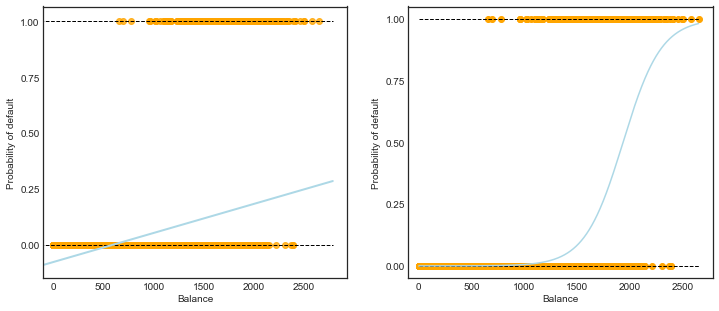

In [4]:
# Create the independent variable X and dependent variable y
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot (Linear Model)
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot (Logistic Model)
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

In [5]:
# Create a new dependent variable y with the factorized column
y = df.default2

In [6]:
# Using Scikit-Learn to build the logistic regression model
# Note that the solver parameter represents the algorithm used in the optimization problem.
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.balance.values.reshape(-1, 1)
clf.fit(X_train, y)
print(clf)
print('Classes: ', clf.classes_)
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
Classes:  [0 1]
Coefficients:  [[0.00549892]]
Intercept:  [-10.65132922]


In [7]:
# Using StatsModels to build the logistic regression model 
# Model: Pr(default) = B0 + B1*balance + e
X_train = sm.add_constant(df.balance)
est = smf.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [8]:
# Using StatsModels to build the logistic regression model
# Model: Pr(default) = B0 + B1*student2 + e
X_train = sm.add_constant(df.student2)
y = df.default2

est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


# Multiple Logistic Regression

In [9]:
# Using StatsModel to build the logistic regression model with multiple independent variables
# Model: Pr(default) = B0 + B1*balance + B2*income + B3*student2 + e
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


In [10]:
# Using Scikit-Learn to build logistic regression model

# Balance and default vectors for student
X_train = df[df.student=='Yes'].balance.values.reshape(df[df.student=='Yes'].balance.size, 1)
y = df[df.student=='Yes'].default2

# Balance and default vectors for non-student
X_train2 = df[df.student=='No'].balance.values.reshape(df[df.student=='No'].balance.size, 1)
y2 = df[df.student=='No'].default2

# Vector with balance values for plotting
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train, y)
clf2.fit(X_train2, y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [11]:
# We can check the counts of each category
df.groupby(['student', 'default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


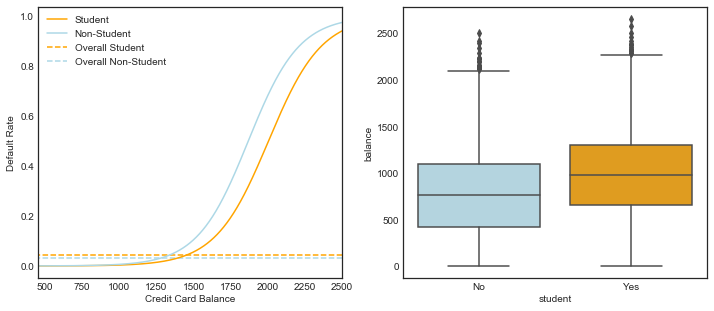

In [12]:
# Creating plot to represent the models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left Plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-Student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
          xmin=ax1.xaxis.get_data_interval()[0],
          xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
          xmin=ax1.xaxis.get_data_interval()[0],
          xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.set_xlim(450, 2500)
ax1.legend(loc=2)

# Right Plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2, palette=c_palette);

# Linear Discriminant Analysis

In [13]:
# Using Scikit-Learn to build a linear discriminant analysis
# Setup the dependent and independent variables
X = df[['balance', 'income', 'student2']].as_matrix()
y = df.default2.as_matrix()

# Model: Pr(default) = B0 + B1*balance + B2*income + B3*student2 + e
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

# Create the confusion matrix to compare the prediction result to the actual data
conf_mat = pd.DataFrame({'True default status': y,
                   'Predicted default status': y_pred})
conf_mat.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

conf_mat.groupby(['Predicted default status', 'True default status']).size().unstack('True default status')

C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [14]:
# Print the classification table
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



In [15]:
# Note that we can also determine the decision boundary.
# Instead of using the probabilyt of 50%, we can also set the probability of default of 20% to be classified as 'Yes'
decision_prob = 0.2
y_prob = lda.fit(X, y).predict_proba(X)

conf_mat = pd.DataFrame({'True default status': y,
                        'Predicted default status': y_prob[:,1] > decision_prob})
conf_mat.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

conf_mat.groupby(['Predicted default status', 'True default status']).size().unstack('True default status')


True default status,No,Yes
Predicted default status,,
No,9435,140
Yes,232,193


# Linear Discriminant Analysis Lab

In [16]:
# Loading the Smarket dataset for the study.
df = pd.read_csv('./Textbook_Data/Smarket.csv', usecols=range(0,9), index_col=0, parse_dates=True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [17]:
df.columns

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction'], dtype='object')

In [18]:
# Create the training data before the year 2004
X_train = df[:'2004'][['Lag1', 'Lag2']]
y_train = df[:'2004']['Direction']

# Create the testing data starting the year 2005
X_test = df['2005':][['Lag1', 'Lag2']]
y_test = df['2005':]['Direction']

# Building the linear discriminant analysis model with the training data
lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

In [19]:
# The proportion of the training observation corresponding to days during which the market went down.
lda.priors_

array([0.49198397, 0.50801603])

In [20]:
# The average of each predictor within each class
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [21]:
# The coefficients of linear discriminants
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [22]:
# The confusion matrix comparing the testting data and prediction
confusion_matrix(y_test, pred).T

array([[ 35,  35],
       [ 76, 106]], dtype=int64)

In [23]:
# The classification report of the linear discriminants
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

   micro avg      0.560     0.560     0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [24]:
# Using the trained model applies to the testing data
pred_p = lda.predict_proba(X_test)

In [25]:
# Using the model to predict the up and down counts (threshold > 50%)
np.unique(pred_p[:,1]>0.5, return_counts=True)

(array([False,  True]), array([ 70, 182], dtype=int64))

In [26]:
# Using the model to predict the up and down counts (threshold > 90%)
np.unique(pred_p[:,1]>0.9, return_counts=True)

(array([False]), array([252], dtype=int64))

# Quadratic Discriminant Analysis

In [27]:
# Using the quadratic discriminant analysis to the Smarket data
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [28]:
# Training observations that corresponding to days during which the market went down.
qda.priors_

array([0.49198397, 0.50801603])

In [29]:
# The average of each predictor within each class
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [30]:
# The confusion matrix comparing the testting data and prediction
confusion_matrix(y_test,pred).T

array([[ 30,  20],
       [ 81, 121]], dtype=int64)

In [31]:
# The classification report of the linear discriminants
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

   micro avg      0.599     0.599     0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



# K-Nearest Neighbors

In [32]:
# Using K-Nearest Neighbors (KNN) model for the stock market data, K=1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)

In [33]:
# Confusion Matrix comparing the testing data and prediction
print(confusion_matrix(y_test, pred).T)

[[43 58]
 [68 83]]


In [34]:
# Classification report of the KNN model
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

   micro avg      0.500     0.500     0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



In [35]:
# Using K-Nearest Neighbors (KNN) model for the stock market data, K=3
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)

In [36]:
# Confusion Matrix comparing the testing data and prediction
print(confusion_matrix(y_test, pred).T)

[[48 55]
 [63 86]]


In [37]:
# Classification report of the KNN model
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

   micro avg      0.532     0.532     0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



# Applciation to Caravan Insurance Data

In [38]:
# Reading the Caravan dataset
df = pd.read_csv('./Textbook_Data/Caravan.csv')
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [39]:
# Creating the dependent and independent variables
y = df.Purchase
X = df.drop('Purchase', axis=1).astype('float64')
X_scaled = preprocessing.scale(X)

In [40]:
# Split the data into training (first 1,000 observations) and testing (1,001st and on) sets
X_train = X_scaled[1000:,:]
y_train = y[1000:]
X_test = X_scaled[:1000,:]
y_test = y[:1000]

In [41]:
# Define a KNN function that returns prediction, score, and classes
def KNN(n_neighbors=1, weights='uniform'):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    return(pred, score, clf.classes_)


In [42]:
# Define a confusion matrix plot function for comparison
def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normanlized)',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized Confusion Matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('True Label', rotation='horizontal', ha='right')
    plt.ylabel('Predicted Label')
    plt.show()

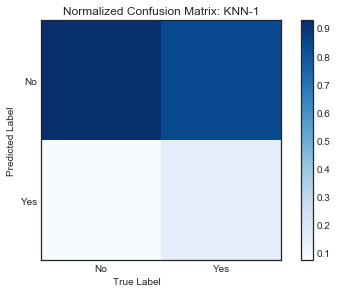

True        No  Yes
Predicted          
No         873   50
Yes         68    9
     Precision
No    0.945829
Yes   0.116883


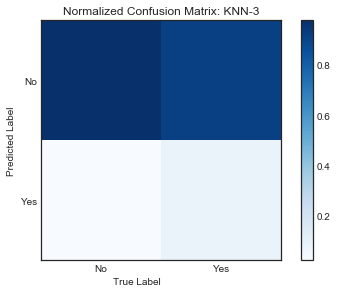

True        No  Yes
Predicted          
No         921   54
Yes         20    5
     Precision
No    0.944615
Yes   0.200000


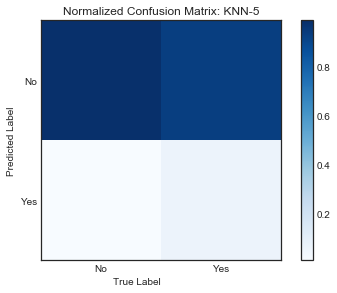

True        No  Yes
Predicted          
No         930   55
Yes         11    4
     Precision
No    0.944162
Yes   0.266667


In [43]:
# Create a for loop to compare results for KNN models with 1, 3, and 5 nearest neighbors.
# Note that KNN model should only take odd number neighbors to avoid tie of positive and negative neighbors.
for i in [1, 3, 5]:
    pred, socre, classes = KNN(i)
    cm = confusion_matrix(y_test, pred)
    cm_normalized = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized.T, classes, n_neighbors=i)
    cm_df = pd.DataFrame(cm.T, index=classes, columns=classes)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)
    print(pd.DataFrame(precision_score(y_test, pred, average=None),
                      index=classes, columns=['Precision']))

In [44]:
# Using Scikit-Learn to build a Logistic Regression Model for the same analysis
regr = skl_lm.LogisticRegression()
regr.fit(X_train, y_train)

C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
# Create Confusion Matrix to compare the testing data and prediction (Threshold 0.5)
# Note that predict() only return the binary values "No" or "Yes"
pred_5 = regr.predict(X_test)
cm_df_5 = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
                    columns=regr.classes_)
cm_df_5.index.name = 'Predicted'
cm_df_5.columns.name = 'True'
print(cm_df_5)
print(classification_report(y_test, pred_5))

True        No  Yes
Predicted          
No         930   55
Yes         11    4
              precision    recall  f1-score   support

          No       0.94      0.99      0.97       941
         Yes       0.00      0.00      0.00        59

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.89      0.93      0.91      1000



In [46]:
# Create Confusion Matrix to compare the testing data and prediction (Threshold 0.25)
# Note that predict_proba() return the probability of 'Yes'
pred_25 = regr.predict_proba(X_test)
cm_df_25 = pd.DataFrame({'True':y_test, 'Pred':pred_25[:,1]>.25})
cm_df_25.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(cm_df_25.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, cm_df_25.Pred))

Pred   No  Yes
True          
No    917   24
Yes    48   11
              precision    recall  f1-score   support

          No       0.95      0.97      0.96       941
         Yes       0.31      0.19      0.23        59

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.63      0.58      0.60      1000
weighted avg       0.91      0.93      0.92      1000

